# Lab : Exploring Convolutions and Pooling

Adoped with thanks from Tensorflw examples.

Copyright 2019 The TensorFlow Authors.

In [27]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Step 1 - Choose an Image
We have a few images for you to play around with in 'images' directory.

Here we are loading an image and shaping it to be square image.

In [28]:
from PIL import Image
import numpy as np

# image_file = 'images/stairs-1.jpg'
# image_file = 'images/stairs-2.jpg'
# image_file = 'images/playground-1.jpg'
# image_file = 'images/temple-1.jpg'
# image_file = 'images/temple-2.jpg'
image_file = 'images/power-1.jpeg'
# image_file = 'images/opera-1.jpg'

image_orig = Image.open(image_file)
print("original image size:", image_orig.size)

# first crop image to square, so convolutions and pooling will work correctly
new_size = min(image_orig.size[0], image_orig.size[1])
if new_size % 2 == 1:  # we don't want odd numbers
    new_size = new_size -1  # make the image even sized
# print (new_size)

image_square = image_orig.crop((0,0,new_size, new_size))
print ("square iamge size:", image_square.size)

# and finally convert to greyscale
image_grey = image_square.convert ('L')

img = np.array(image_grey)

original image size: (183, 275)
square iamge size: (182, 182)


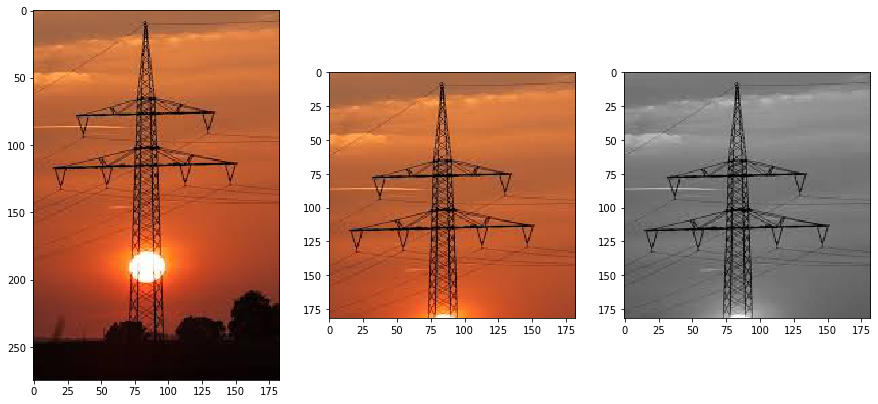

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plt.subplot(1,3,1).imshow(image_orig)
plt.subplot(1,3,2).imshow(image_square)
plt.gray()
plt.subplot(1,3,3).imshow(image_grey)
plt.show()

## Step 2 - Convolutions

Let's explore how convolutions work by creating a basic convolution on a 2D Grey Scale image. 

Now we can create a filter as a 3x3 array. 

In [30]:
i_transformed = np.copy(img)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]


In [31]:
## TODO: Choose a filter

#Experiment with different values for fun effects.

## Edge detection filter
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.
filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

## vertical filter
# filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]

# horizontal filter
# filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

# pretty print as matrix
print (np.matrix(filter[::-1]).T)

[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


Now let's create a convolution. We will iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter. 

i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter etc. etc. We'll then multiply the result by the weight, and then ensure the result is in the range 0-255

Finally we'll load the new value into the transformed image. 

In [32]:
%%time

for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (img[x - 1, y-1] * filter[0][0])
      convolution = convolution + (img[x, y-1] * filter[0][1])
      convolution = convolution + (img[x + 1, y-1] * filter[0][2])
      convolution = convolution + (img[x-1, y] * filter[1][0])
      convolution = convolution + (img[x, y] * filter[1][1])
      convolution = convolution + (img[x+1, y] * filter[1][2])
      convolution = convolution + (img[x-1, y+1] * filter[2][0])
      convolution = convolution + (img[x, y+1] * filter[2][1])
      convolution = convolution + (img[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

CPU times: user 530 ms, sys: 0 ns, total: 530 ms
Wall time: 530 ms


Now we can plot the image to see the effect of the convolution!

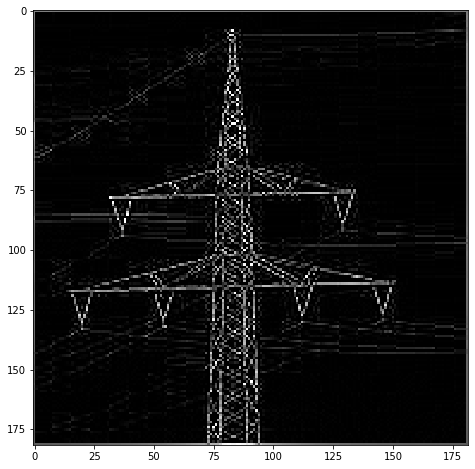

In [33]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.figure(figsize=(8,8))
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   

## Step 3 - Pooling

This code will show a (2, 2) pooling. The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. Take the largest of them and load it into the new image. Thus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!

In [34]:
%%time

new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    newImage[int(x/2),int(y/2)] = max(pixels)


CPU times: user 60.2 ms, sys: 351 µs, total: 60.6 ms
Wall time: 10.1 ms


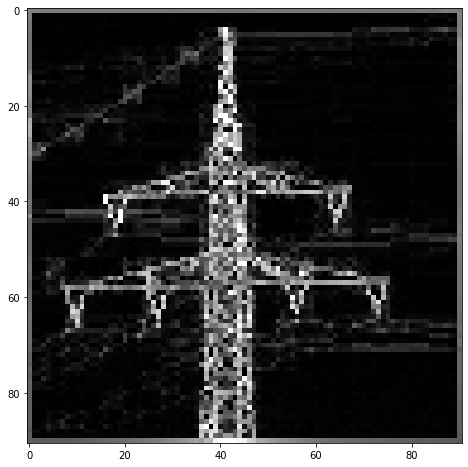

In [35]:
# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.figure(figsize=(8,8))
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()   

## Exercises

### Exercise 1: Try different filters
In Step-2, try different filters and observe the effects

### Exercise 2: Try different images
We have few images, in the 'images' folder.  
Try them out and observe the effect 

### Exercise 3: Try your own images
Feel free to upload your own images into the images folder and load them.  
This is a fun exercise :-) 

### Exercise 4: Try your on filters!  (Advanced)
Play around with some of your own filters!  
For inspiration, see these resources
- https://lodev.org/cgtutor/filtering.html
- https://en.wikipedia.org/wiki/Kernel_(image_processing)